연습문제 1: 각 국가별 CO2 배출량 비교
문제: 2010년부터 2020년까지, 미국(US), 중국(CN), 인도(IN) 3개 국가의 이산화탄소(CO2) 배출량(EN.ATM.CO2E.KT)을 가져오고, 각 국가별 배출량을 비교할 수 있는 시각화를 만드세요.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
import wbdata
import pandas as pd

In [5]:
wbdata.get_countries(query='india')

id    name
----  ------
IND   India

In [9]:
wbdata.get_indicators(query="CO2 Emissions")

id                    name
--------------------  ---------------------------------------------------------------------------------------------------------------------------------
CC.CO2.EMSE.BF        CO2 emissions by sector (Mt CO2 eq) - Bunker Fuels
CC.CO2.EMSE.BL        CO2 emissions by sector (Mt CO2 eq) - Building
CC.CO2.EMSE.EH        CO2 emissions by sector (Mt CO2 eq) - Electricity/Heat
CC.CO2.EMSE.EL        CO2 emissions by sector (Mt CO2 eq) - Total excluding LUCF
CC.CO2.EMSE.EN        CO2 emissions by sector (Mt CO2 eq) - Energy
CC.CO2.EMSE.FE        CO2 emissions by sector (Mt CO2 eq) - Fugitive Emissions
CC.CO2.EMSE.IL        CO2 emissions by sector (Mt CO2 eq) - Total including LUCF
CC.CO2.EMSE.IP        CO2 emissions by sector (Mt CO2 eq) - Industrial Processes
CC.CO2.EMSE.LU        CO2 emissions by sector (Mt CO2 eq) - Land-Use Change and Forestry
CC.CO2.EMSE.MC        CO2 emissions by sector (Mt CO2 eq) - Manufacturing/Construction
CC.CO2.EMSE.OF        CO2 emissions b

In [66]:
result_dict = wbdata.get_data("CC.CO2.EMSE.EN", country=["USA","CHN","IND"], date=('2010','2020'))
result_dict

[{'indicator': {'id': 'CC.CO2.EMSE.EN',
   'value': 'CO2 emissions by sector (Mt CO2 eq) - Energy'},
  'country': {'id': 'CHN', 'value': 'China'},
  'countryiso3code': '',
  'date': '2020',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'CC.CO2.EMSE.EN',
   'value': 'CO2 emissions by sector (Mt CO2 eq) - Energy'},
  'country': {'id': 'CHN', 'value': 'China'},
  'countryiso3code': '',
  'date': '2019',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'CC.CO2.EMSE.EN',
   'value': 'CO2 emissions by sector (Mt CO2 eq) - Energy'},
  'country': {'id': 'CHN', 'value': 'China'},
  'countryiso3code': '',
  'date': '2018',
  'value': 9531.46,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'CC.CO2.EMSE.EN',
   'value': 'CO2 emissions by sector (Mt CO2 eq) - Energy'},
  'country': {'id': 'CHN', 'value': 'China'},
  'countryiso3code': '',
  'date': '2017',
  'value': 9248.47,
  'unit': '',

In [67]:
# 먼저 기본 데이터프레임 생성
df = pd.json_normalize(result_dict)[['country.id', 'date', 'value']]

# 피벗 테이블로 재구성
df_pivot = df.pivot(index='date', 
                    columns='country.id', 
                    values='value')
df_pivot

country.id,CHN,IND,USA
date,,,
2010,7830.97,1573.95,5361.42
2011,8569.65,1664.31,5139.89
2012,8818.41,1807.17,4914.94
2013,9188.38,1862.51,5053.13
2014,9116.34,2028.87,5063.14
2015,9096.74,2038.42,4942.88
2016,9057.91,2072.68,4849.20
2017,9248.47,2192.53,4773.40
2018,9531.46,2309.22,4940.08


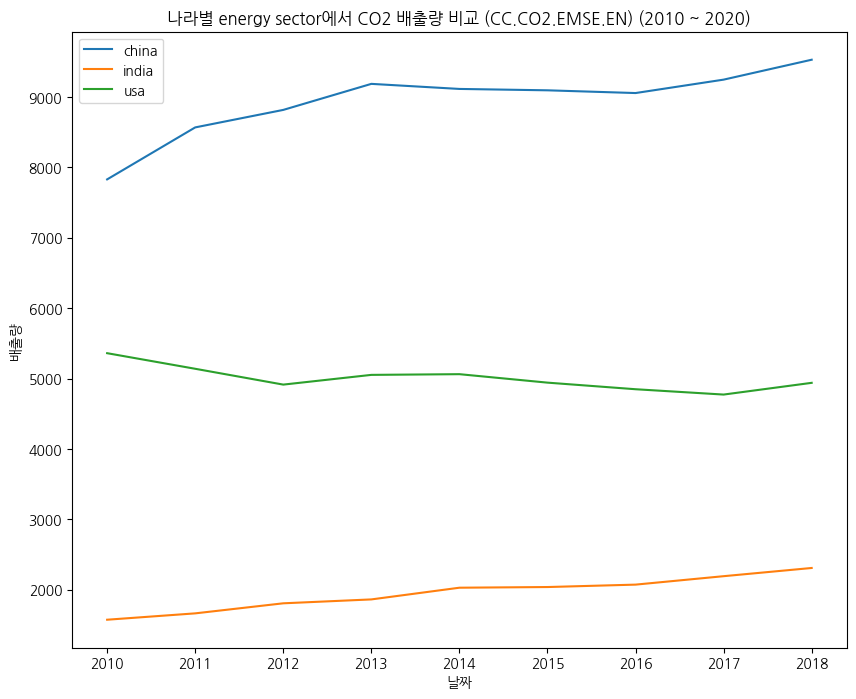

In [68]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(df_pivot.index, df_pivot['CHN'] , label='china') 
plt.plot(df_pivot.index, df_pivot['IND'] , label='india') 
plt.plot(df_pivot.index, df_pivot['USA'] , label='usa') 

plt.title('나라별 energy sector에서 CO2 배출량 비교 (CC.CO2.EMSE.EN) (2010 ~ 2020)')
plt.xlabel('날짜')
plt.ylabel('배출량')
plt.legend()
plt.show()

연습문제 2: 특정 국가의 실업률 변화 추적
문제: 2010년부터 2020년까지, 프랑스(FR), 독일(DE), 영국(GB) 3개 국가의 실업률(SL.UEM.TOTL.ZS) 데이터를 가져와 시각화하세요.

In [43]:
wbdata.get_countries(query='brazil')


id    name
----  ------
BRA   Brazil

In [27]:
wbdata.get_indicators(query="unemployment rate")

id                    name
--------------------  ---------------------------------------------------------------------------------------------------------------
JI.UEM.1524.FE.ZS     Youth unemployment rate, aged 15-24, female (% of female youth labor force)
JI.UEM.1524.HE.ZS     Youth unemployment rate, aged 15-24, above primary education (% of youth labor force with high education)
JI.UEM.1524.LE.ZS     Youth unemployment rate, aged 15-24, primary education and below (% of youth labor force with low education)
JI.UEM.1524.MA.ZS     Youth unemployment rate, aged 15-24, male (% of male youth labor force)
JI.UEM.1524.RU.ZS     Youth unemployment rate, aged 15-24, rural (% of rural youth labor force)
JI.UEM.1524.UR.ZS     Youth unemployment rate, aged 15-24, urban (% of urban youth labor force)
JI.UEM.1524.ZS        Youth unemployment rate, aged 15-24, total (% of total youth labor force)
JI.UEM.1564.FE.ZS     Unemployment rate, aged 15-64, female (% of female labor force in working age)

In [69]:
result_dict = wbdata.get_data("SL.UEM.TOTL.ZS", country=["FRA","DEU",'GBR'], date=('2010','2020'))
result_dict

[{'indicator': {'id': 'SL.UEM.TOTL.ZS',
   'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2020',
  'value': 3.856,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SL.UEM.TOTL.ZS',
   'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2019',
  'value': 3.136,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SL.UEM.TOTL.ZS',
   'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2018',
  'value': 3.384,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SL.UEM.TOTL.ZS',
   'value': 'Unemployment, total (% of total labor force) (modeled ILO estimate)'},
  'country': {'id'

In [70]:
# 먼저 기본 데이터프레임 생성
df = pd.json_normalize(result_dict)[['country.id', 'date', 'value']]

# 피벗 테이블로 재구성
df_pivot = df.pivot(index='date', 
                    columns='country.id', 
                    values='value')
df_pivot

country.id,DE,FR,GB
date,,,
2010,6.967,9.279,7.787
2011,5.825,9.228,8.038
2012,5.379,9.841,7.885
2013,5.231,9.913,7.525
2014,4.981,10.273,6.110
2015,4.624,10.354,5.301
2016,4.122,10.057,4.810
2017,3.746,9.410,4.330
2018,3.384,9.018,3.996


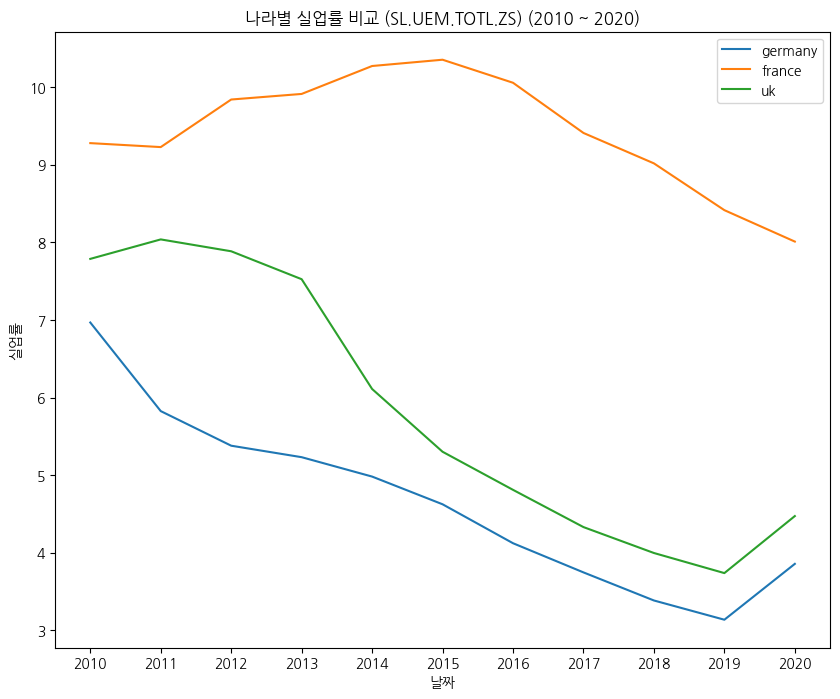

In [71]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(df_pivot.index, df_pivot['DE'] , label='germany') 
plt.plot(df_pivot.index, df_pivot['FR'] , label='france') 
plt.plot(df_pivot.index, df_pivot['GB'] , label='uk') 

plt.title('나라별 실업률 비교 (SL.UEM.TOTL.ZS) (2010 ~ 2020)')
plt.xlabel('날짜')
plt.ylabel('실업률')
plt.legend()
plt.show()

연습문제 3: 각 국가의 인터넷 사용자 비율 비교
문제: 2010년부터 2020년까지, 미국(US), 중국(CN), 브라질(BRA) 3개 국가의 인터넷 사용자 비율(IT.NET.USER.ZS) 데이터를 가져오고, 해당 데이터에 대해 평균값을 계산하고 시각화하세요.

In [ ]:
wbdata.get_indicators(query="unemployment rate")

In [72]:
result_dict = wbdata.get_data("IT.NET.USER.ZS", country=["USA","CHN",'BRA'], date=('2010','2020'))
result_dict

[{'indicator': {'id': 'IT.NET.USER.ZS',
   'value': 'Individuals using the Internet (% of population)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2020',
  'value': 81.3427,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IT.NET.USER.ZS',
   'value': 'Individuals using the Internet (% of population)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2019',
  'value': 73.9124,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IT.NET.USER.ZS',
   'value': 'Individuals using the Internet (% of population)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2018',
  'value': 70.4343,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IT.NET.USER.ZS',
   'value': 'Individuals using the Internet (% of population)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2017',

In [74]:
# 먼저 기본 데이터프레임 생성
df = pd.json_normalize(result_dict)[['country.id', 'date', 'value']]

# 피벗 테이블로 재구성
df_pivot = df.pivot(index='date', 
                    columns='country.id', 
                    values='value')
df_pivot

country.id,BR,CN,US
date,,,
2010,40.6500,34.3000,71.6900
2011,45.6900,38.3000,69.7295
2012,48.5600,42.3001,74.7000
2013,51.0400,45.8000,71.4000
2014,54.5510,47.9000,73.0000
2015,58.3280,50.3000,74.5542
2016,60.8725,53.2000,85.5444
2017,67.4713,54.3000,87.2749
2018,70.4343,59.2000,88.4989


In [53]:
df_pivot['BR'].mean(),df_pivot['CN'].mean(),df_pivot['US'].mean()

(59.3502, 50.884890909090906, 80.21809090909092)

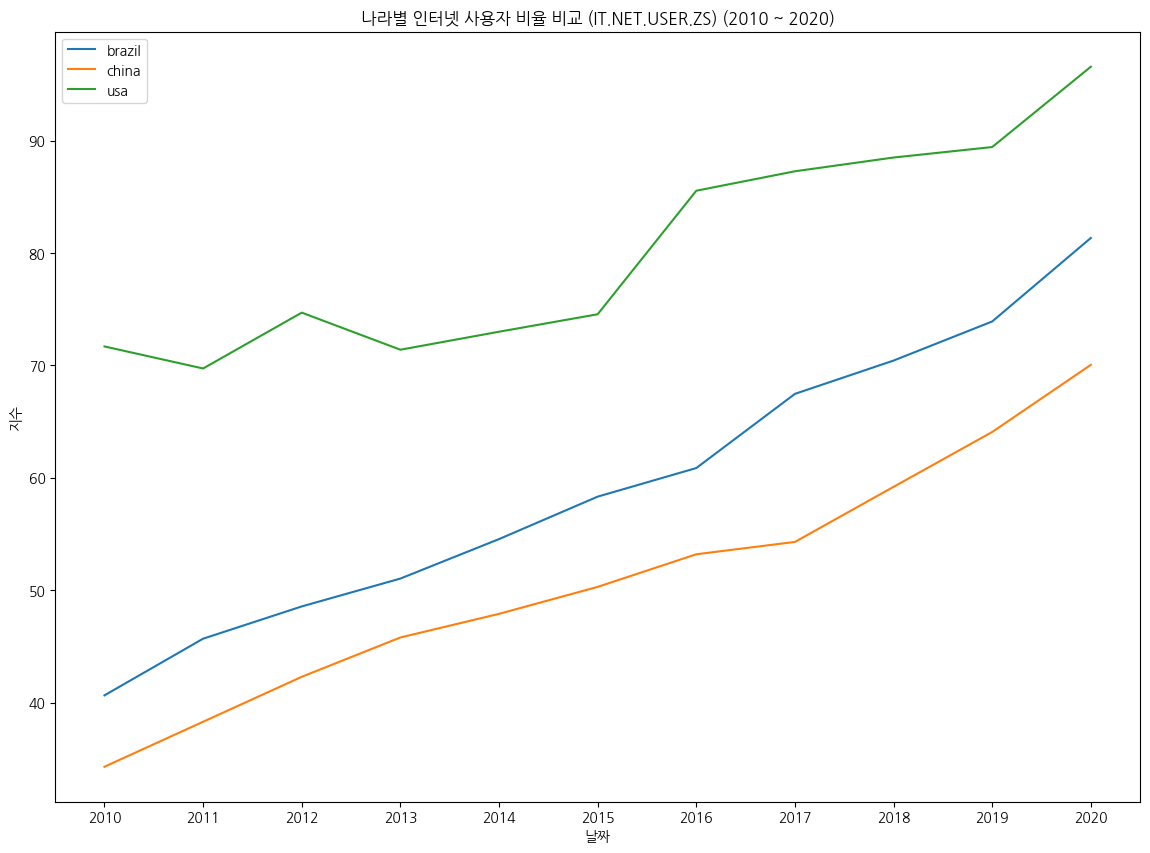

In [75]:
plt.figure(figsize=(14,10), dpi=100)
plt.plot(df_pivot.index, df_pivot['BR'] , label='brazil') 
plt.plot(df_pivot.index, df_pivot['CN'] , label='china') 
plt.plot(df_pivot.index, df_pivot['US'] , label='usa') 

plt.title('나라별 인터넷 사용자 비율 비교 (IT.NET.USER.ZS) (2010 ~ 2020)')
plt.xlabel('날짜')
plt.ylabel('사용자 비율')
plt.legend()
plt.show()

문제 4: 교육 지표 데이터 가져오기
문제: SE.XPD.TOTL.GD.ZS (총 교육 지출 비율) 지표에 대해 2010년부터 2019년까지의 데이터를 가져오고, US, UK, DE 국가의 데이터를 시각화하세요.

In [77]:
result_dict = wbdata.get_data("SE.XPD.TOTL.GD.ZS", country=["USA","GBR",'DEU'], date=('2010','2019'))
result_dict

[{'indicator': {'id': 'SE.XPD.TOTL.GD.ZS',
   'value': 'Government expenditure on education, total (% of GDP)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2019',
  'value': 5.11552000045776,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SE.XPD.TOTL.GD.ZS',
   'value': 'Government expenditure on education, total (% of GDP)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2018',
  'value': 4.97933006286621,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SE.XPD.TOTL.GD.ZS',
   'value': 'Government expenditure on education, total (% of GDP)'},
  'country': {'id': 'DE', 'value': 'Germany'},
  'countryiso3code': 'DEU',
  'date': '2017',
  'value': 4.87182998657227,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'SE.XPD.TOTL.GD.ZS',
   'value': 'Government expenditure on education, total (% of GDP)'},
  'country': {'id': 'DE', 'va

In [78]:
# 먼저 기본 데이터프레임 생성
df = pd.json_normalize(result_dict)[['country.id', 'date', 'value']]

# 피벗 테이블로 재구성
df_pivot = df.pivot(index='date', 
                    columns='country.id', 
                    values='value')
df_pivot

country.id,DE,GB,US
date,,,
2010,5.09588,5.698680,6.694554
2011,4.98425,5.572190,6.497684
2012,4.92844,5.578874,6.253886
2013,4.93539,5.525300,6.229258
2014,4.92102,5.601350,6.129206
2015,4.85515,5.554520,4.930630
2016,4.83923,5.427960,4.783280
2017,4.87183,5.452570,5.092970
2018,4.97933,5.204370,4.895020


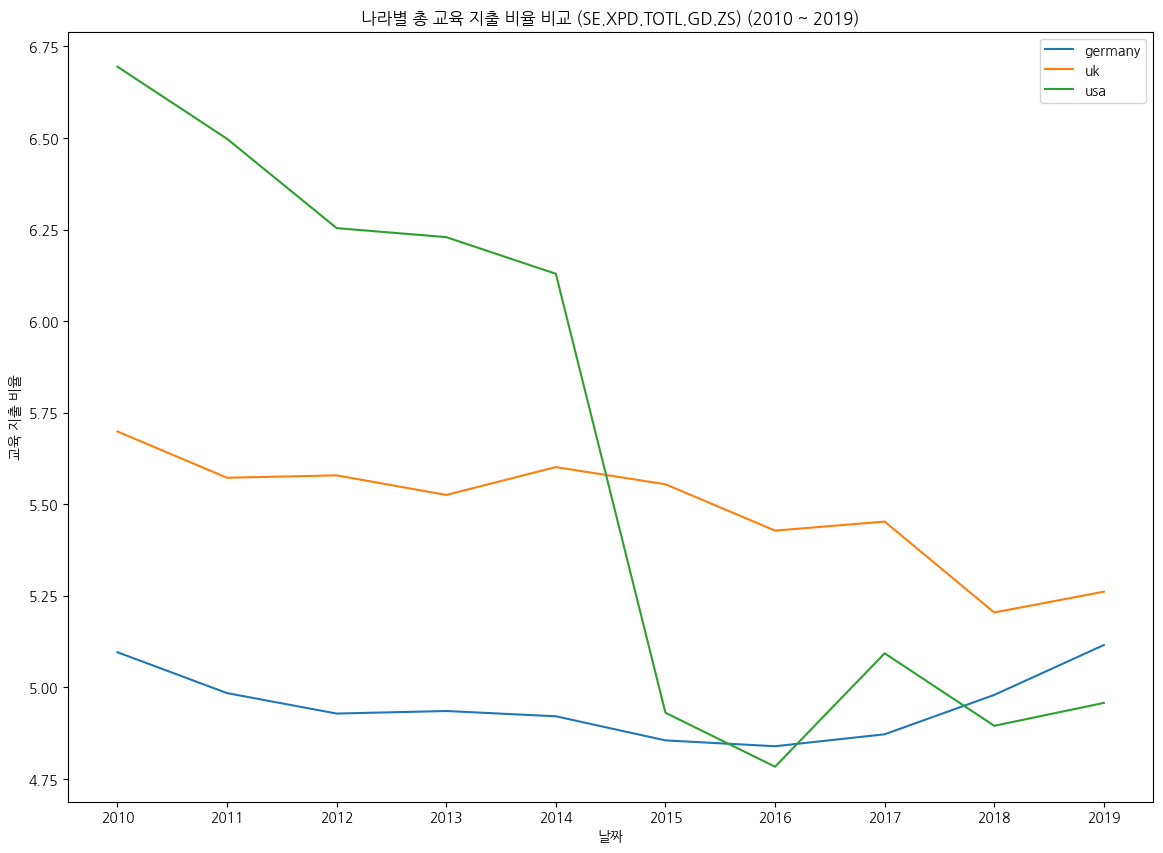

In [79]:
plt.figure(figsize=(14,10), dpi=100)
plt.plot(df_pivot.index, df_pivot['DE'] , label='germany') 
plt.plot(df_pivot.index, df_pivot['GB'] , label='uk') 
plt.plot(df_pivot.index, df_pivot['US'] , label='usa') 

plt.title('나라별 총 교육 지출 비율 비교 (SE.XPD.TOTL.GD.ZS) (2010 ~ 2019)')
plt.xlabel('날짜')
plt.ylabel('교육 지출 비율')
plt.legend()
plt.show()

문제 5: 특정 지표의 국가별 최신 데이터 가져오기
문제: SP.DYN.LE00.IN (기대 수명) 지표에 대해, US, KR, IN, BR 국가의 최신 데이터를 가져오고 출력하세요.

In [59]:
result_dict = wbdata.get_data("SP.DYN.LE00.IN", country=["USA","KOR",'IND','BRA'])
result_dict

[{'indicator': {'id': 'SP.DYN.LE00.IN',
   'value': 'Life expectancy at birth, total (years)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2023',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.DYN.LE00.IN',
   'value': 'Life expectancy at birth, total (years)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2022',
  'value': 73.425,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.DYN.LE00.IN',
   'value': 'Life expectancy at birth, total (years)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2021',
  'value': 72.75,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.DYN.LE00.IN',
   'value': 'Life expectancy at birth, total (years)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2020',
  'value': 74.009,
  'unit': '',
  'obs_s

In [64]:
# 먼저 기본 데이터프레임 생성
df = pd.json_normalize(result_dict)[['country.id', 'date', 'value']]

# 피벗 테이블로 재구성
df_pivot = df.pivot(index='date', 
                    columns='country.id', 
                    values='value')

df_pivot.sort_index(ascending=False).iloc[1]

country.id
BR    73.425000
IN    67.744000
KR    82.680488
US    77.434146
Name: 2022, dtype: float64